In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
df.rename(columns={"poutcome" : "outcome", "y" : "subscribed"}, inplace = True)

In [6]:
df.shape

(41188, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  outcome         41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## EDA

JOB

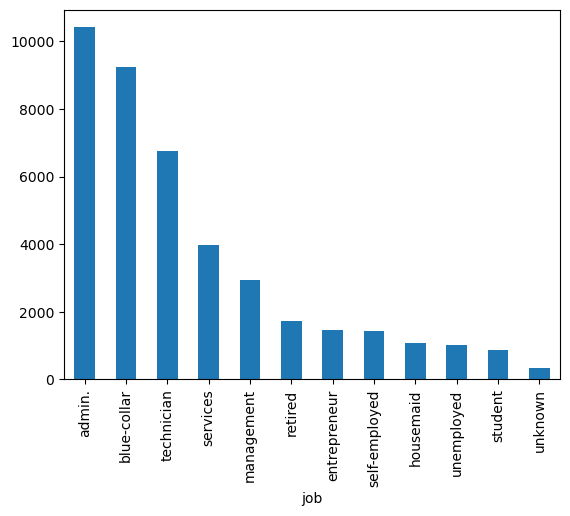

In [10]:
df["job"].value_counts().plot(kind = "bar");

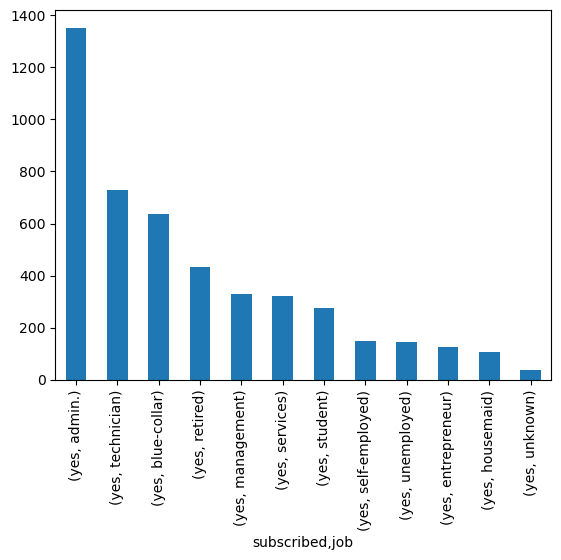

In [11]:
yes_sub = df.groupby("subscribed")["job"].value_counts()[12:].plot(kind = "bar")

#### **Inference: -**

1) Most of our clients works as "admin" followed by "blue-collar", followed by "techician".
2) Client who works as "admin" has higher chance of subscribing to the term deposit followed by "technician", followed by "blue-collar".

# Marital

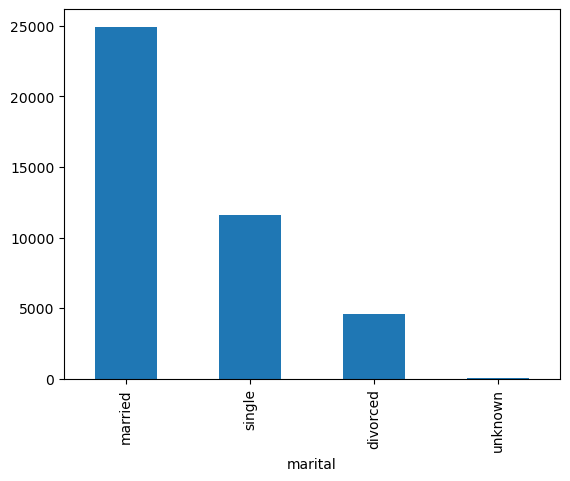

In [14]:
df["marital"].value_counts().plot(kind = "bar");

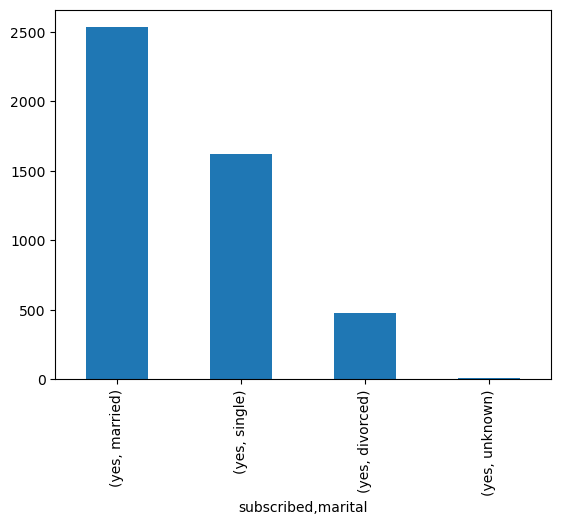

In [15]:
df.groupby("subscribed")["marital"].value_counts()[4:].plot(kind = "bar");

#### Inference: -

Most of our clients are married and also has the highest chance of subscribing to term deposit.

#### **Eduction: -**

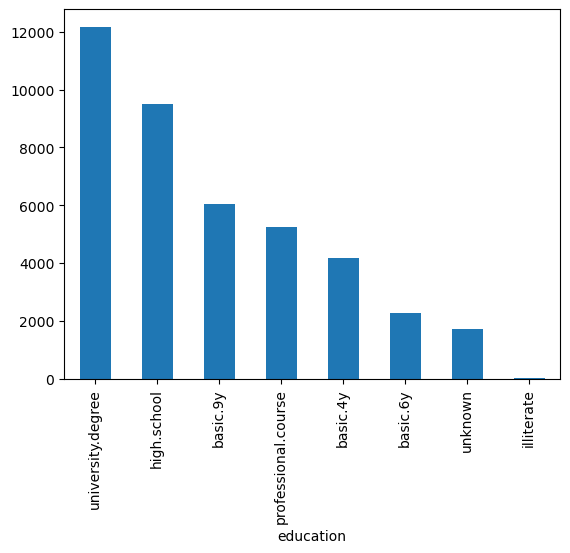

In [18]:
df["education"].value_counts().plot(kind = "bar");

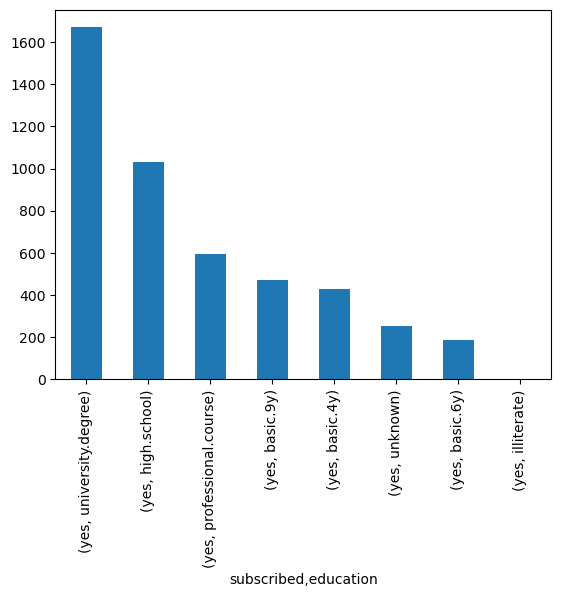

In [19]:
df.groupby("subscribed")["education"].value_counts()[8:].plot(kind = "bar");

#### **Inference: -**

Most of our client have university degree and also have the highest chance of subsrcibing to term deposit

#### **Housing loan and Personal loan: -**

In [22]:
df["housing"].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

<Axes: xlabel='subscribed,housing'>

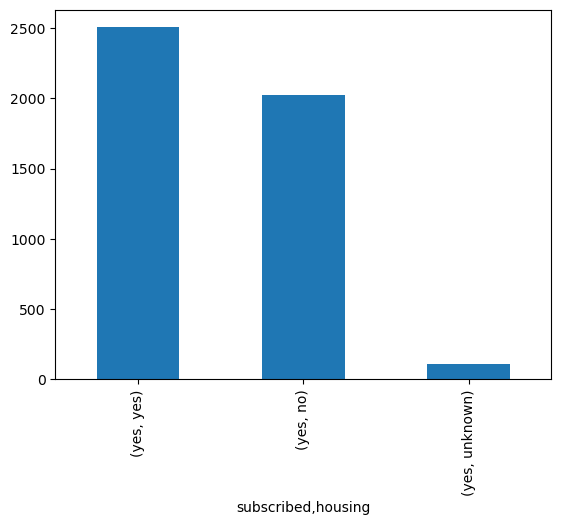

In [23]:
df.groupby("subscribed")["housing"].value_counts()[3:].plot(kind = "bar")

In [24]:
df["loan"].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

<Axes: xlabel='subscribed,loan'>

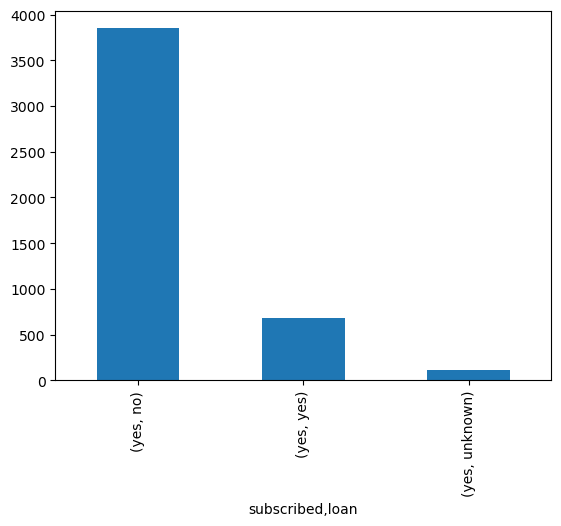

In [25]:
df.groupby("subscribed")["loan"].value_counts()[3:].plot(kind = "bar")

#### **Inference: -**

Most of our clients have housing loan and they have higher chance of subscribing to the term deposit.

#### **Duration: -**

In [28]:
df[df["duration"] == df["duration"].max()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,4918,1,999,0,nonexistent,-0.1,93.2,-42.0,4.406,5195.8,no


In [29]:
df[df["duration"] == df["duration"].min()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,0,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


In [30]:
df["duration"].mean()

258.2850101971448

In [31]:
above_mean_duration = df[df["duration"] >= 258]

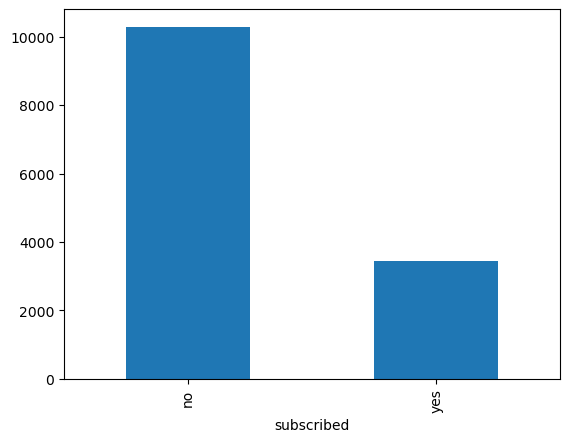

In [32]:
above_mean_duration["subscribed"].value_counts().plot(kind = "bar");

#### **Inference: -**

Just because the duration of the call is high, it doesn't guarantee that the client will subscribe to the term deposit.  

#### **Campaign: -**

In [35]:
df[df["campaign"] == df["campaign"].max()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,261,56,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [36]:
df["campaign"].median()

2.0

In [37]:
above_median_campaign = df[df["campaign"] >= 2]

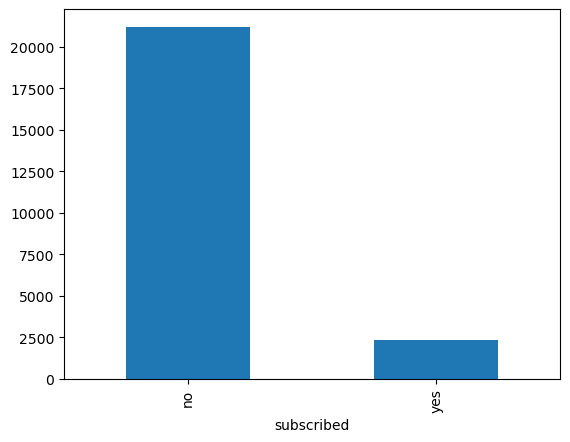

In [38]:
above_median_campaign["subscribed"].value_counts().plot(kind = "bar");

In [39]:
below_median_campaign = df[df["campaign"] < 2]

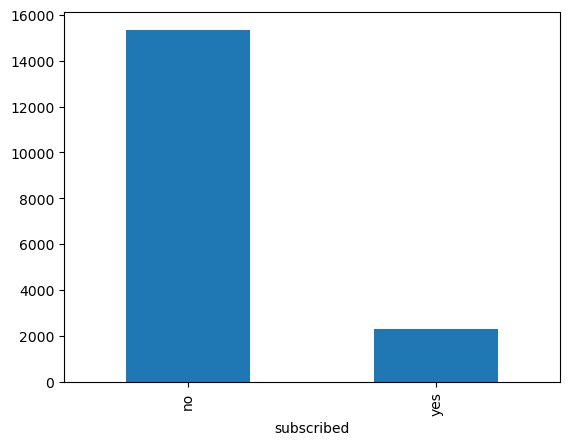

In [40]:
below_median_campaign["subscribed"].value_counts().plot(kind = "bar");

#### **Inference: -**

1) Campaign more than 2 or less that 2 does not show any major difference in client's behaviour in terms of subscribing to term deposit.  
2) Client who were campaigned more than 2 has equal amount of subscriber count compared to clients who were campaigned less than 2.

## **Handling Missing Values: -**

In [43]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
outcome           0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [44]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


job


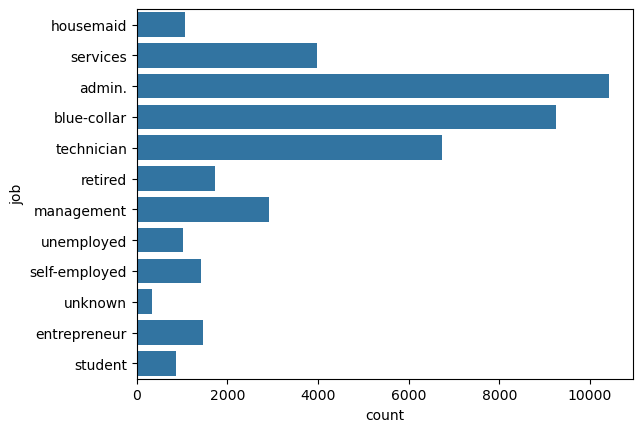

marital


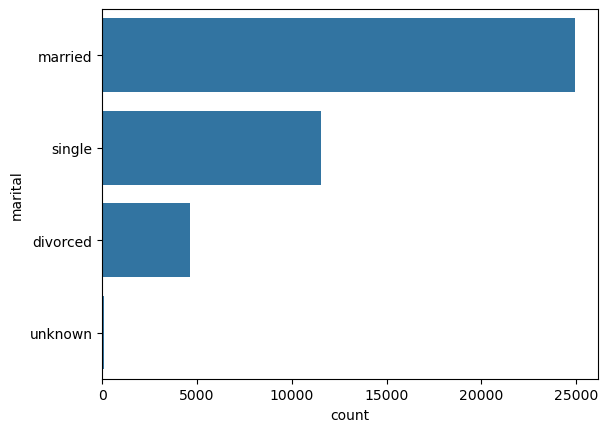

education


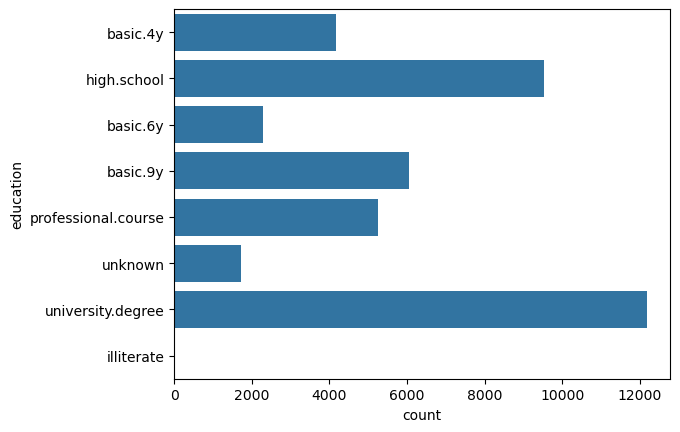

default


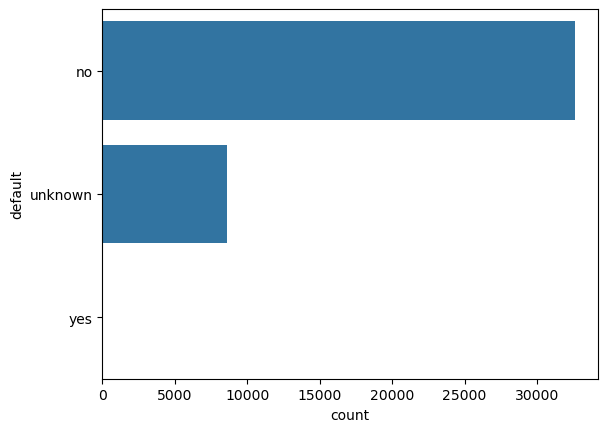

housing


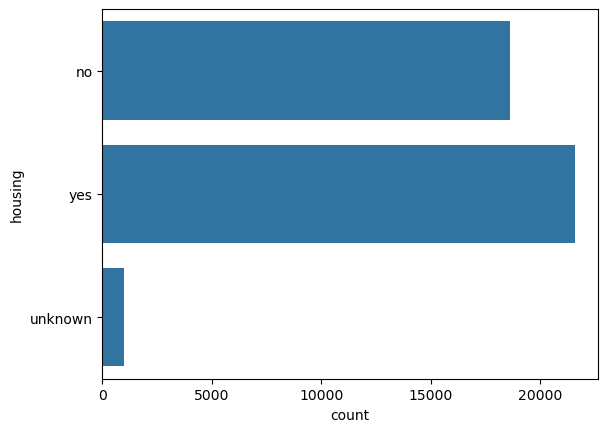

loan


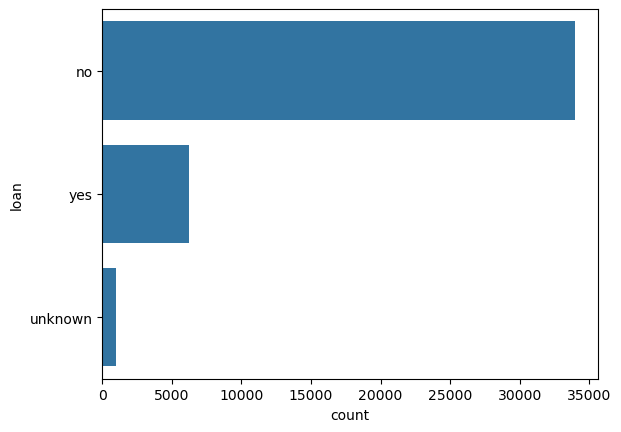

contact


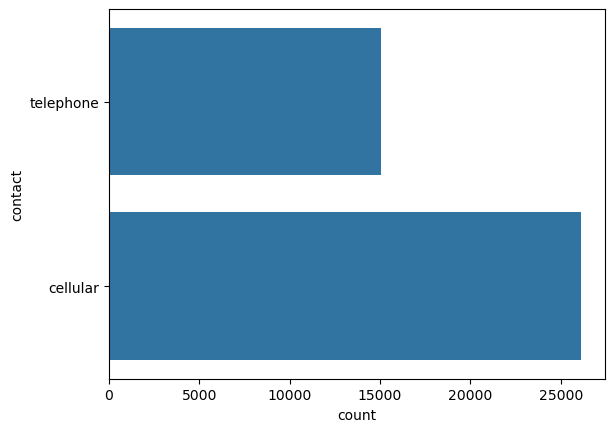

month


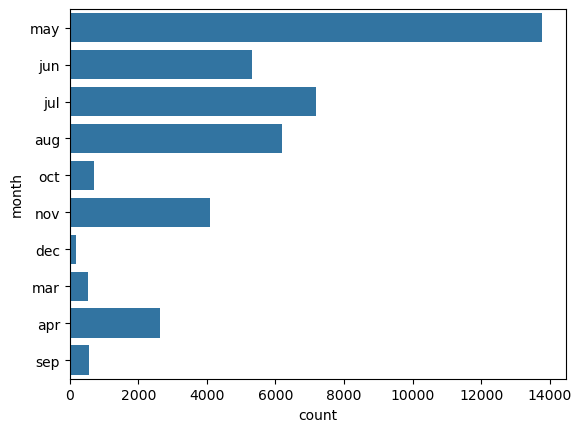

day_of_week


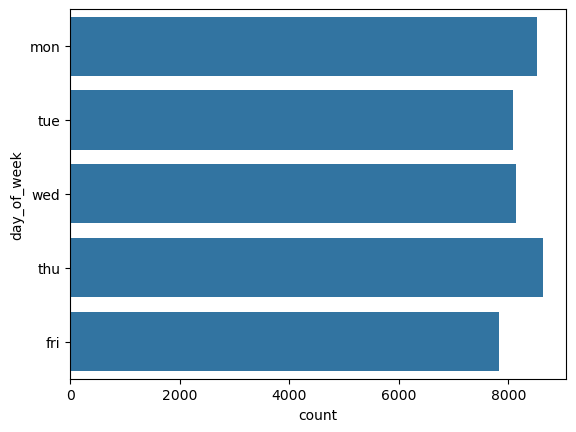

outcome


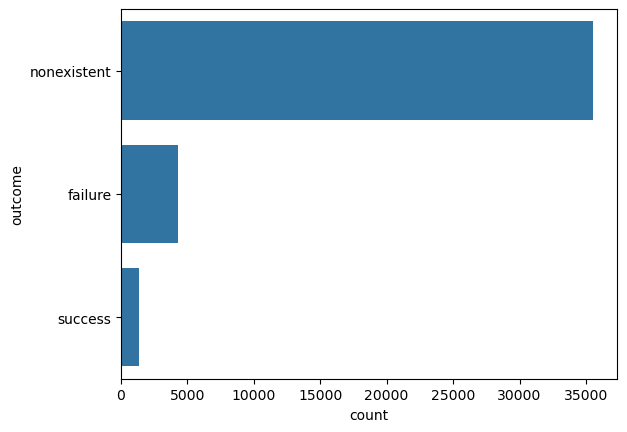

subscribed


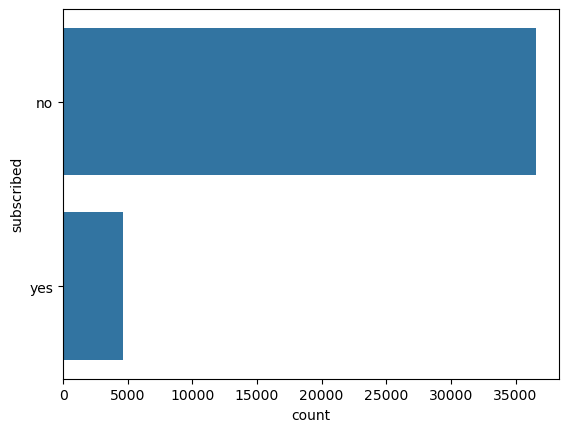

In [45]:
for col_name in df.select_dtypes("object").columns:
    print(col_name)
    sns.countplot(df[col_name])
    plt.show()

## **Encoding: -**

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

In [49]:
for col_name in df.select_dtypes("object").columns:
    df[col_name] = le.fit_transform(df[col_name])

## **SMOTE: -**

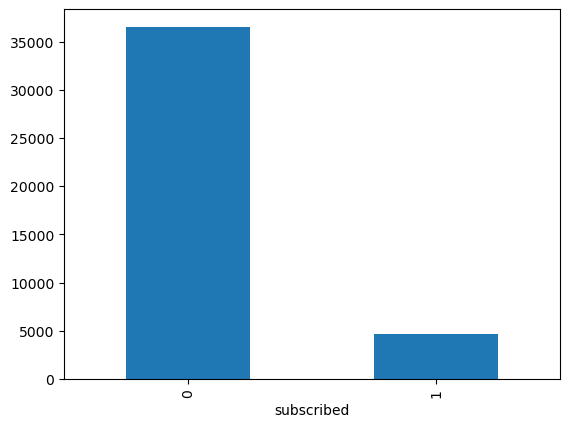

In [51]:
df["subscribed"].value_counts().plot(kind = "bar");

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
sm = SMOTE(random_state = 100)

In [54]:
X = df.drop("subscribed", axis = 1)
y = df["subscribed"]

In [55]:
X, y = sm.fit_resample(X, y)

C:\Users\Om Singh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Om Singh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Om Singh\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Om Singh\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Om Singh\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _w

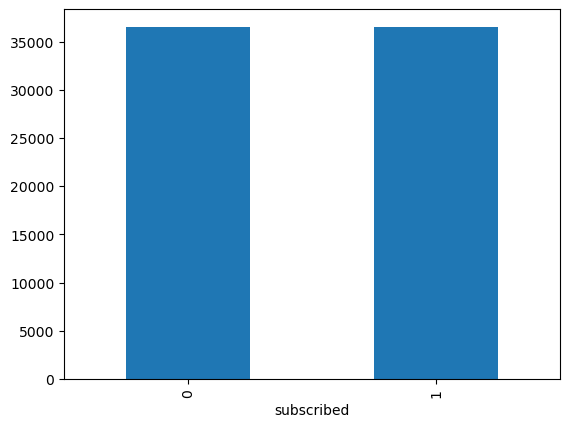

In [56]:
y.value_counts().plot(kind = "bar");

## **Standard Scaler: -**

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
ss = StandardScaler()

In [60]:
X = ss.fit_transform(X)

## **Train test split: -**

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)

## **Model Building: -**

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred = lr.predict(X_test)

## **Evaluation : -**

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7310
           1       0.88      0.90      0.89      7310

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620



#### **Decision Tree: -**

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      7310
           1       0.91      0.94      0.93      7310

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620



#### **Random Forest: -**

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      7310
           1       0.94      0.97      0.95      7310

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



## **Hyper Parameter Tuning: -**

#### **Random Forest Parameter Tuning: -**

In [81]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ParameterGrid

In [82]:
rf_2 = RandomForestClassifier()
try_parameters = {'n_estimators':[3,5,15],
                  'criterion':['gini','entropy'],
                  'max_depth':[5,10,None],
                  'min_samples_split':[2,5,10],
                  'min_samples_leaf':[1,5,10]}

In [83]:
grid = GridSearchCV(rf_2, param_grid = try_parameters, cv = 5)

In [84]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [3, 5, 15]})

In [85]:
print('Best Parameters:',grid.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}


In [86]:
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      7310
           1       0.93      0.96      0.95      7310

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



## **Feature Selection: -**

In [88]:
rf_3 = RandomForestClassifier()

In [89]:
rf_3.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
rf_3.feature_importances_

array([0.03774979, 0.02438627, 0.011336  , 0.02374019, 0.01994249,
       0.02103554, 0.01347517, 0.04010286, 0.03081997, 0.02264096,
       0.34732478, 0.01921516, 0.0170381 , 0.01057007, 0.01460377,
       0.05395471, 0.04560352, 0.05362661, 0.12352868, 0.06930534])

In [91]:
importance = pd.DataFrame(columns = ['name','imp'])

In [92]:
X = df.drop("subscribed", axis = 1)
y = df["subscribed"]

In [93]:
importance['name'] = X.columns
importance['imp'] = dt.feature_importances_

In [94]:
importance[importance["imp"] > 0.1]

,name,imp
10,duration,0.381877
19,nr.employed,0.186783


#### **Model Building based on feature importance: -**

In [196]:
new_df = df[["subscribed", "duration", "nr.employed"]]

In [197]:
X = new_df.drop("subscribed", axis = 1)
y = new_df["subscribed"]

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)

In [203]:
rf_3 = RandomForestClassifier()
try_parameters = {'n_estimators':[3,5,15],
                  'criterion':['gini','entropy'],
                  'max_depth':[5,10,None],
                  'min_samples_split':[2,5,10],
                  'min_samples_leaf':[1,5,10]}

In [214]:
grid = GridSearchCV(rf_3, param_grid = try_parameters, cv = 3)

In [216]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [3, 5, 15]})

In [217]:
print('Best Parameters:',grid.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 15}


In [218]:
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7310
           1       0.61      0.51      0.56       928

    accuracy                           0.91      8238
   macro avg       0.78      0.74      0.75      8238
weighted avg       0.90      0.91      0.91      8238



## **Final Model: -**

In [223]:
model_perf = pd.DataFrame({"Model" : ["lr", "df", "rf", "rf_2", "rf_3"], "Accuracy" : [89, 93, 95, 95, 91]})

In [225]:
model_perf

,Model,Accuracy
0,lr,89
1,df,93
2,rf,95
3,rf_2,95
4,rf_3,91


Random Forest model has the best performance compared to other classification model with 95% accuracy.